# Simulation of the Vestibular System

## Overview

* 3 DOF Translations -> Otoliths (Utricle, Saccule) 
* 3 DOF Rotations -> 3 Semicircular Canals 

## Semicircular Canals

Each canal can be described by a vector perpendicular to the surface spanned by
the canal $\vec{n}$

\begin{equation}
    stim = \vec{\omega} \cdot \vec{n}
\end{equation}

$\vec{\omega}$ ... relativ to the *head*!

### Orientation of all 3 Canals, on the Right Side of the Head


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Canals = {'info': 'The matrix rows describe horizontal, anterior, and posterior canal orientation',
 'right': np.array([[0.365, 0.158, -0.905], 
    [0.652, 0.753, -0.017],
    [0.757, -0.561, 0.320]]),
 'left': np.array([[-0.365, 0.158, 0.905],
    [-0.652, 0.753, 0.017],
    [-0.757, -0.561, -0.320]])}

print(Canals['info'])
print(Canals['right'])

The matrix rows describe horizontal, anterior, and posterior canal orientation
[[ 0.365  0.158 -0.905]
 [ 0.652  0.753 -0.017]
 [ 0.757 -0.561  0.32 ]]


### Example: Stimulation of the Right Horizontal Canal, by Rotation to the Right, with 100 deg/2

In [3]:
omega = np.r_[0, 0, -100]
stim = omega @ Canals['right'][0]
print(stim)

90.5


### Dynamics

The semicircular canals can be well approximated by the equations governing a *Damped Oscillator*.

* x ... position of mass in space
* b ... position of base
* k ... spring constant
* $\delta = b - x$ ... difference

\begin{equation}
    m \ddot{x} = r \dot{\delta} + k * \delta
\end{equation}
\begin{equation}
    m \ddot{b} = m \ddot{\delta} + r \dot{\delta} + k * \delta
\end{equation}

With a Laplace transformation, where

\begin{equation}
    \frac{dx}{dt} \rightarrow s \tilde{X} - x(0)
\end{equation}
this leads to

\begin{equation}
    \frac{\Delta}{sB} = \frac{m * s}{m s^2 + r s + k}
\end{equation}

## Otoliths

\begin{equation}
    \vec{F}=\overrightarrow{GIF} \cdot \vec{n}
\end{equation}

\begin{equation}
    \overrightarrow{GIF} = \vec{g} + \frac{d^2\vec{x}}{dt^2}
\end{equation}

$\vec{n}$ ... Sensitivity vector

- For the utricle, the sensitivity vectors lie approx. in the horizontal plane
- For the saccule, the sensitivity vectors lie approx. in the vertical plane


### Transduction

Without stimulation, haircells have a *resting firing rate* of approx 100 Hz.
To achieve good bidirectional response, otoliths and canals work in a *push-pull*
fashion. This also explains the orientation of the canals.

## Analysis

### Position from velocity: numerical calculation
* Select a *reference position*
* Define a coordinate system
* Take the (discrete) velocity v(t)
* Calculate the cumulative sum of the position steps $\Delta x_i = v_i * \Delta t$

\begin{equation}
    \vec{x}(t) = \vec{x}(0) + \sum_{i=1}^{n}{\vec{v}(t_i) \Delta t}
\end{equation}

In [4]:
# Set the experimenal parameters
rate = 50     # sample rate, in [Hz]
duration = 10  # [sec]
vel_max = 100
x0 = 0         # Initial position

In [5]:
# Simulate a velocity step, starting after 1 sec, and increasing for the next second
from scipy.integrate import cumtrapz

t = np.arange(duration*rate)/rate
vel = np.zeros(duration*rate)
vel[rate:2*rate] = np.linspace(0, vel_max, rate)
vel[2*rate:]= vel_max  # deg/sec

# Calculate the corresponding position in space
pos = cumtrapz(vel, dx=1/rate, initial=x0)

Text(0.5, 0, 'Time [sec]')

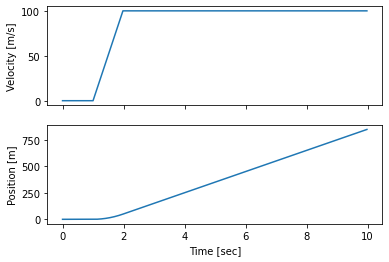

In [6]:
# Plot the results
fig, axs = plt.subplots(2, 1, sharex=True)

axs[0].plot(t, vel)
axs[0].set_ylabel('Velocity [m/s]')
axs[1].plot(t, pos)
axs[1].set_ylabel('Position [m]')
axs[1].set_xlabel('Time [sec]')

### Orientation from Angular Velocity

* Get to understand what *quaternions* are.
* Define a coordinate system (typically *right-handed* coordinate systems).
* Select a *reference orientation*, described by the quaternion $q_0$.
* Take the (discrete) velocity $\vec{\omega}(t)$.
* If the velocity describes the movement in a *body-centered coordinate system*, the orientation as a function of time $q(t)$ is given by

\begin{equation}
    q(t) = q(0) \circ \prod_{i=1}^{n}{q(t_i) dt}
\end{equation}

A *Python* implementation of this equation is implemented in the function $skinematics.quat.vel2quat()$

[Vestibular_3_SCC_Transduction.ipynb](Vestibular_3_SCC_Transduction.ipynb)<img src="data/images/Backward.png" align="middle">

    Author: Thomas Haslwanter
    Date: Feb 16, 2023

<img src="data/images/CCA_40.png">
*The Vestibular System*  is licensed under a Creative Commons Attribution 4.0 International License.